In [49]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')

import plottingsystem as pts
Styrene = """
  C    0.0000000    0.3705681    2.9744693
  C    0.0000000   -0.5377330    1.9899643
  C    0.0000000   -0.2198770    0.5350858
  C    0.0000000   -1.2891808   -0.3790048
  C    0.0000000   -1.0503841   -1.7564567
  C    0.0000000    0.2587518   -2.2400258
  C    0.0000000    1.3314055   -1.3467646
  C    0.0000000    1.0994127    0.0326785
  H    0.0000000    0.0372889    4.0073999
  H    0.0000000    1.4372560    2.7942895
  H    0.0000000   -1.5842539    2.2834225
  H    0.0000000   -2.3136447   -0.0266960
  H    0.0000000   -1.8819740   -2.4493180
  H    0.0000000    0.4421446   -3.3067392
  H    0.0000000    2.3461279   -1.7237485
  H    0.0000000    1.9584017    0.6861456
"""


# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = pts.taking_carbon_coordinates(Styrene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)

[[ 2.9744693  0.3705681]
 [ 1.9899643 -0.537733 ]
 [ 0.5350858 -0.219877 ]
 [-0.3790048 -1.2891808]
 [-1.7564567 -1.0503841]
 [-2.2400258  0.2587518]
 [-1.3467646  1.3314055]
 [ 0.0326785  1.0994127]]


In [50]:
styrene_molecule = gto.M(atom=Styrene, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = pts.taking_indices(styrene_molecule, ['C 2px'])
print(pz_indices)
hf = scf.RHF(styrene_molecule)
hf_energy = hf.kernel()

[2, 7, 12, 17, 22, 27, 32, 37]


converged SCF energy = -303.83141009125


In [51]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)


In [52]:
mo_eigenvalues = hf.mo_energy[[22,25, 26, 27, 28, 29, 30, 31]]
pz_orbitals = mo_coeff[pz_indices][:,[22,25, 26, 27, 28, 29, 30, 31]]


In [53]:
D = pts.making_D(pz_orbitals, 8)

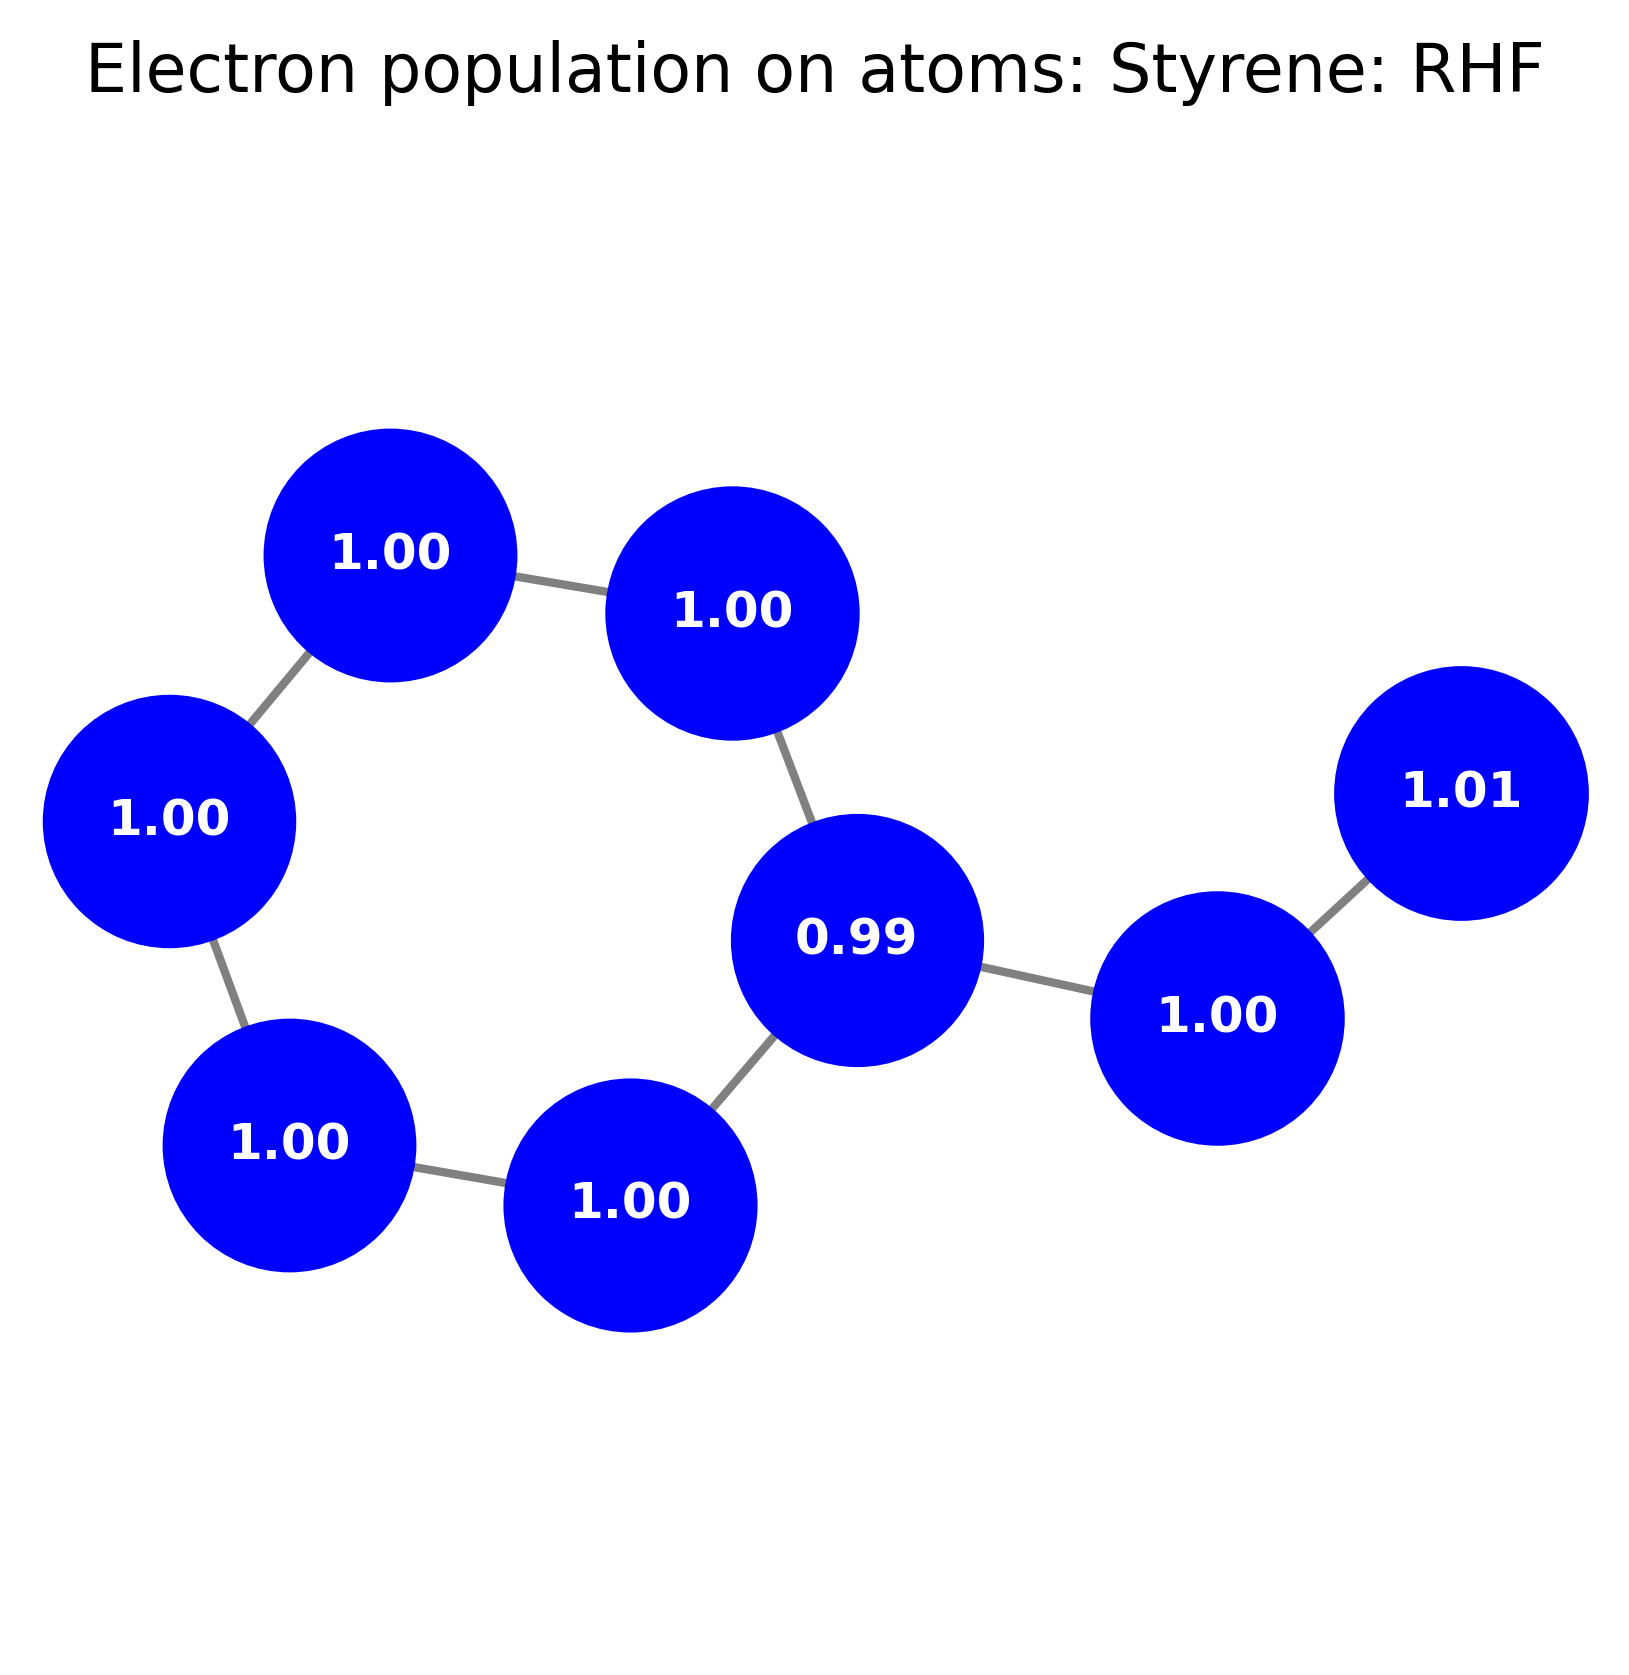

In [54]:
extra_bounds = [(2,7)]
pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D, 'Styrene', 'RHF')

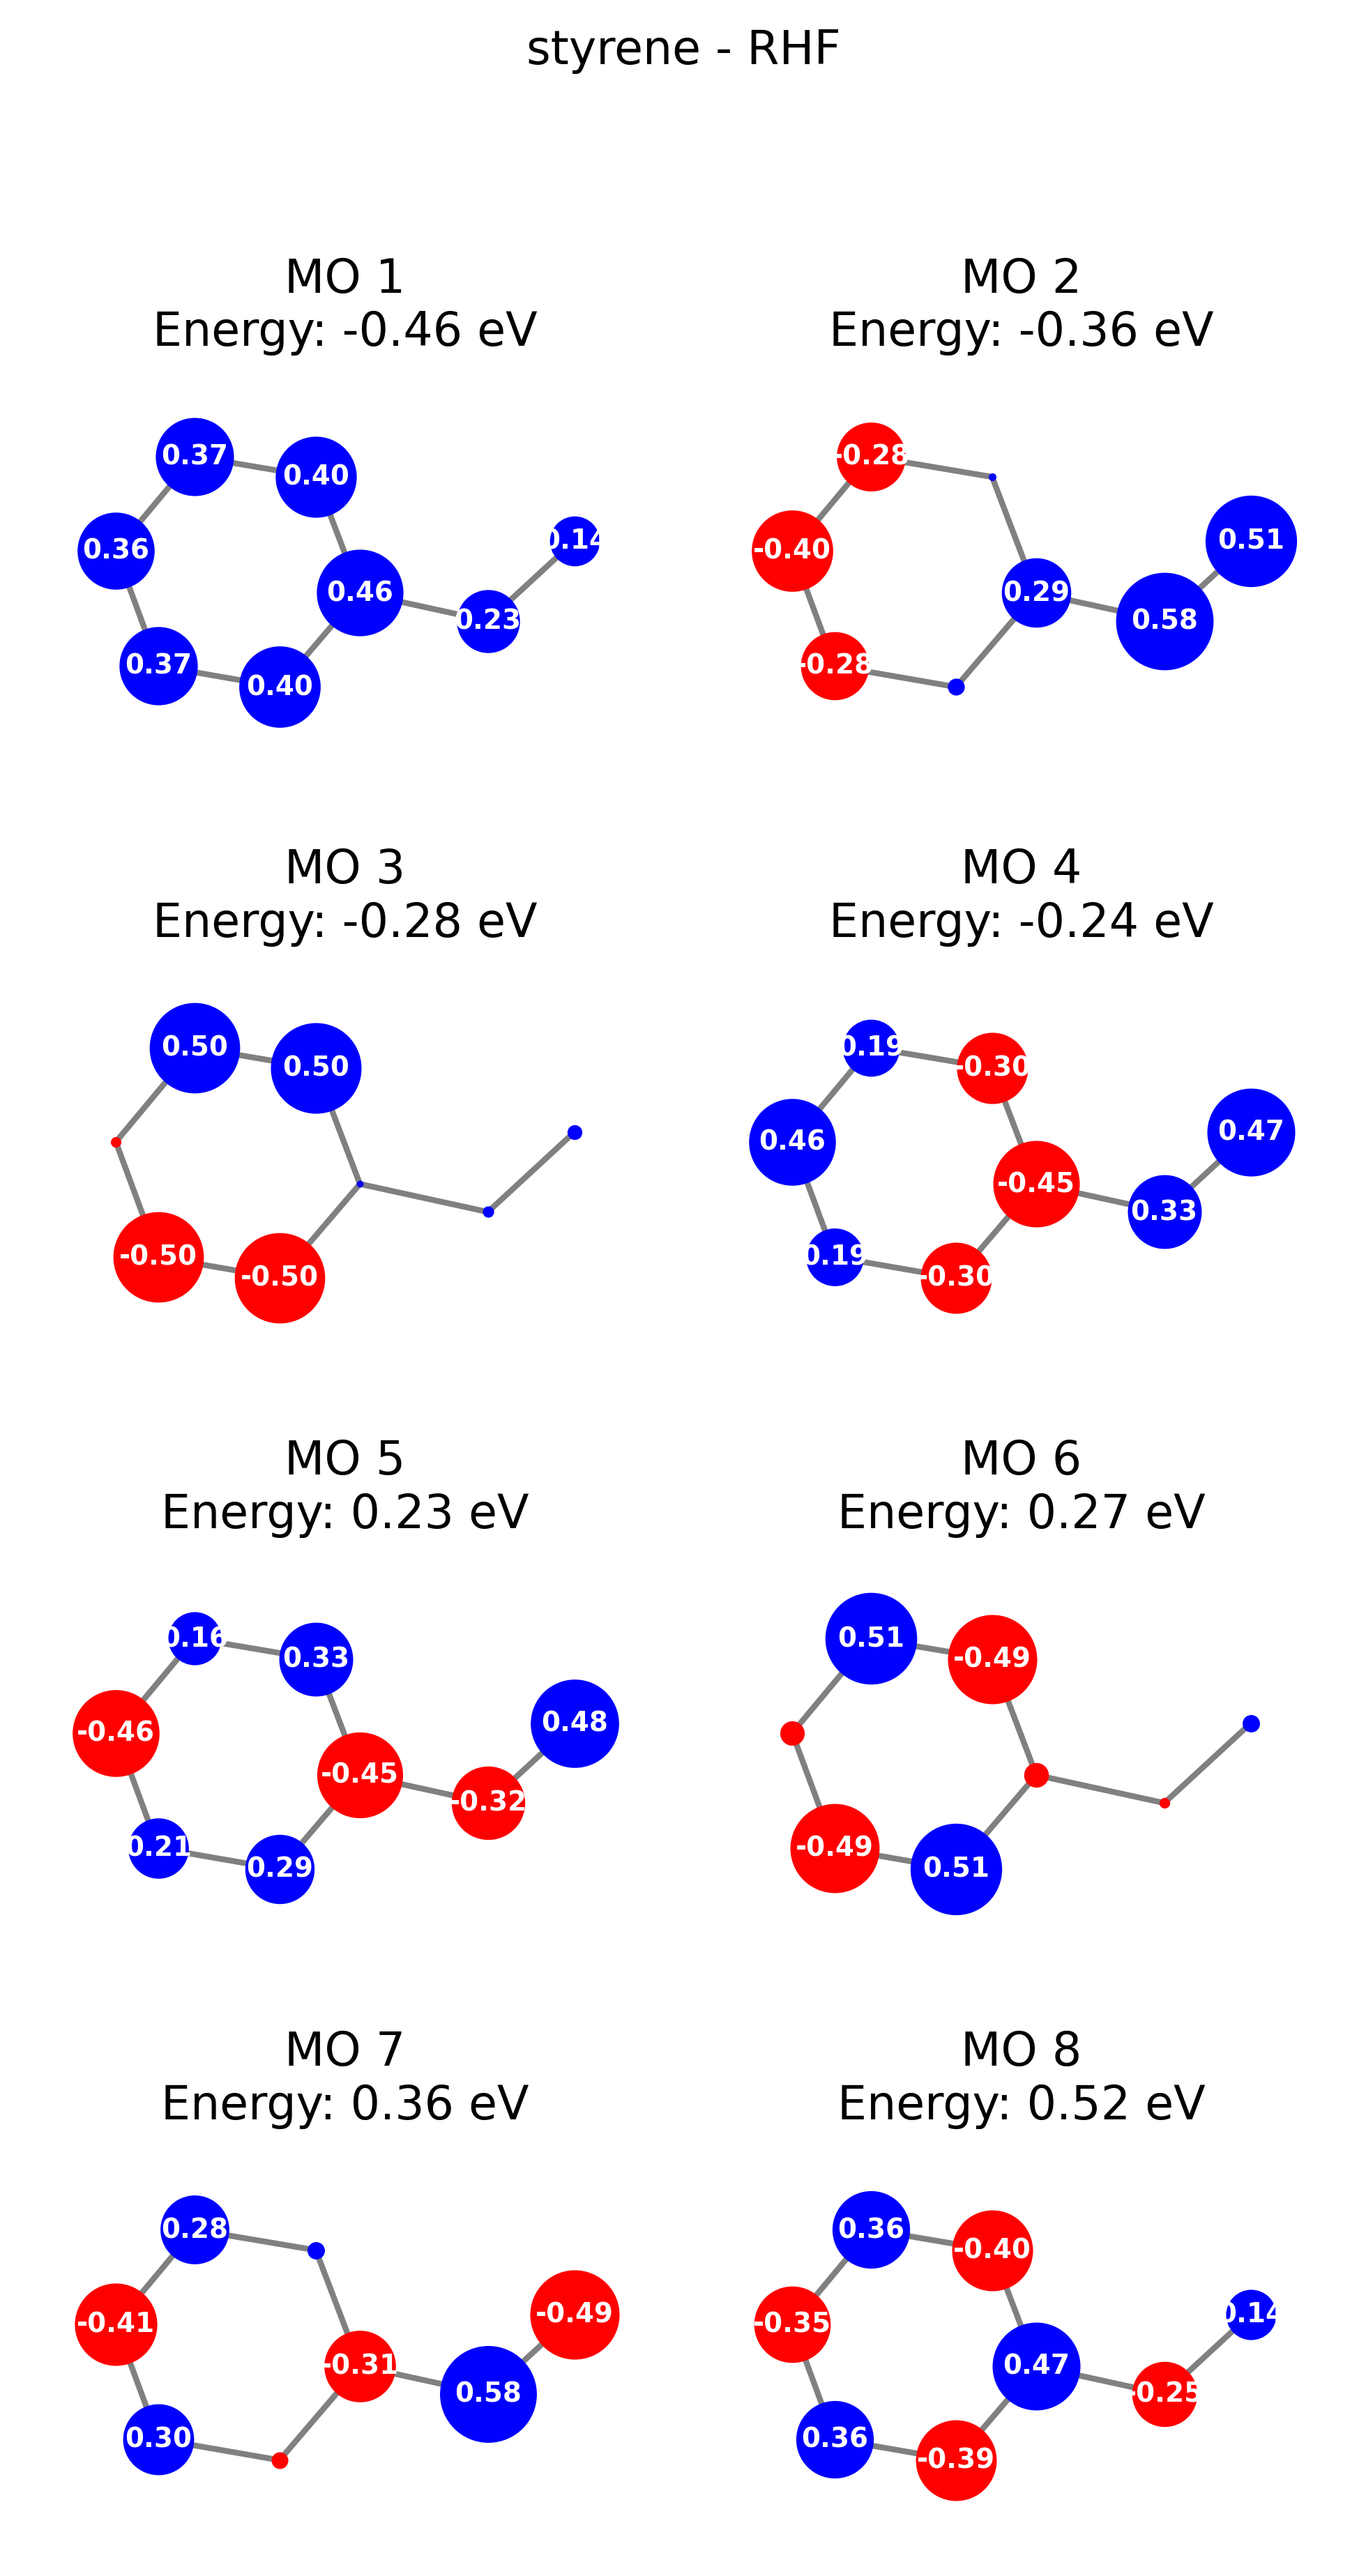

In [55]:
pts.plot_MOs(mo_eigenvalues, pz_orbitals, coordinates, extra_bounds, 'styrene', 'RHF', (5,10))

In [56]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
styrene = huckel(10, -2, -1)
styrene.create_matrix()
a = 0
b= -0.24
styrene.huckel_matrix = np.array([
    [a, b, 0, 0, 0, 0, 0, 0],
    [b, a, b, 0, 0, 0, 0, 0],
    [0, b, a, b, 0, 0, 0, b],
    [0, 0, b, a, b, 0, 0, 0],
    [0, 0, 0, b, a, b, 0, 0],
    [0, 0, 0, 0, b, a, b, 0],
    [0, 0, 0, 0, 0, b, a, b],
    [0, 0, b, 0, 0, 0, b, a],
  
])
huc_mat = styrene.huckel_matrix

print(huc_mat)

[[ 0.   -0.24  0.    0.    0.    0.    0.    0.  ]
 [-0.24  0.   -0.24  0.    0.    0.    0.    0.  ]
 [ 0.   -0.24  0.   -0.24  0.    0.    0.   -0.24]
 [ 0.    0.   -0.24  0.   -0.24  0.    0.    0.  ]
 [ 0.    0.    0.   -0.24  0.   -0.24  0.    0.  ]
 [ 0.    0.    0.    0.   -0.24  0.   -0.24  0.  ]
 [ 0.    0.    0.    0.    0.   -0.24  0.   -0.24]
 [ 0.    0.   -0.24  0.    0.    0.   -0.24  0.  ]]


In [57]:
styrene.solve_huckel_matrix()
eigenvalues = styrene.eigenvalues

eigenvectors = styrene.eigenvectors

eigenvectors = - eigenvectors


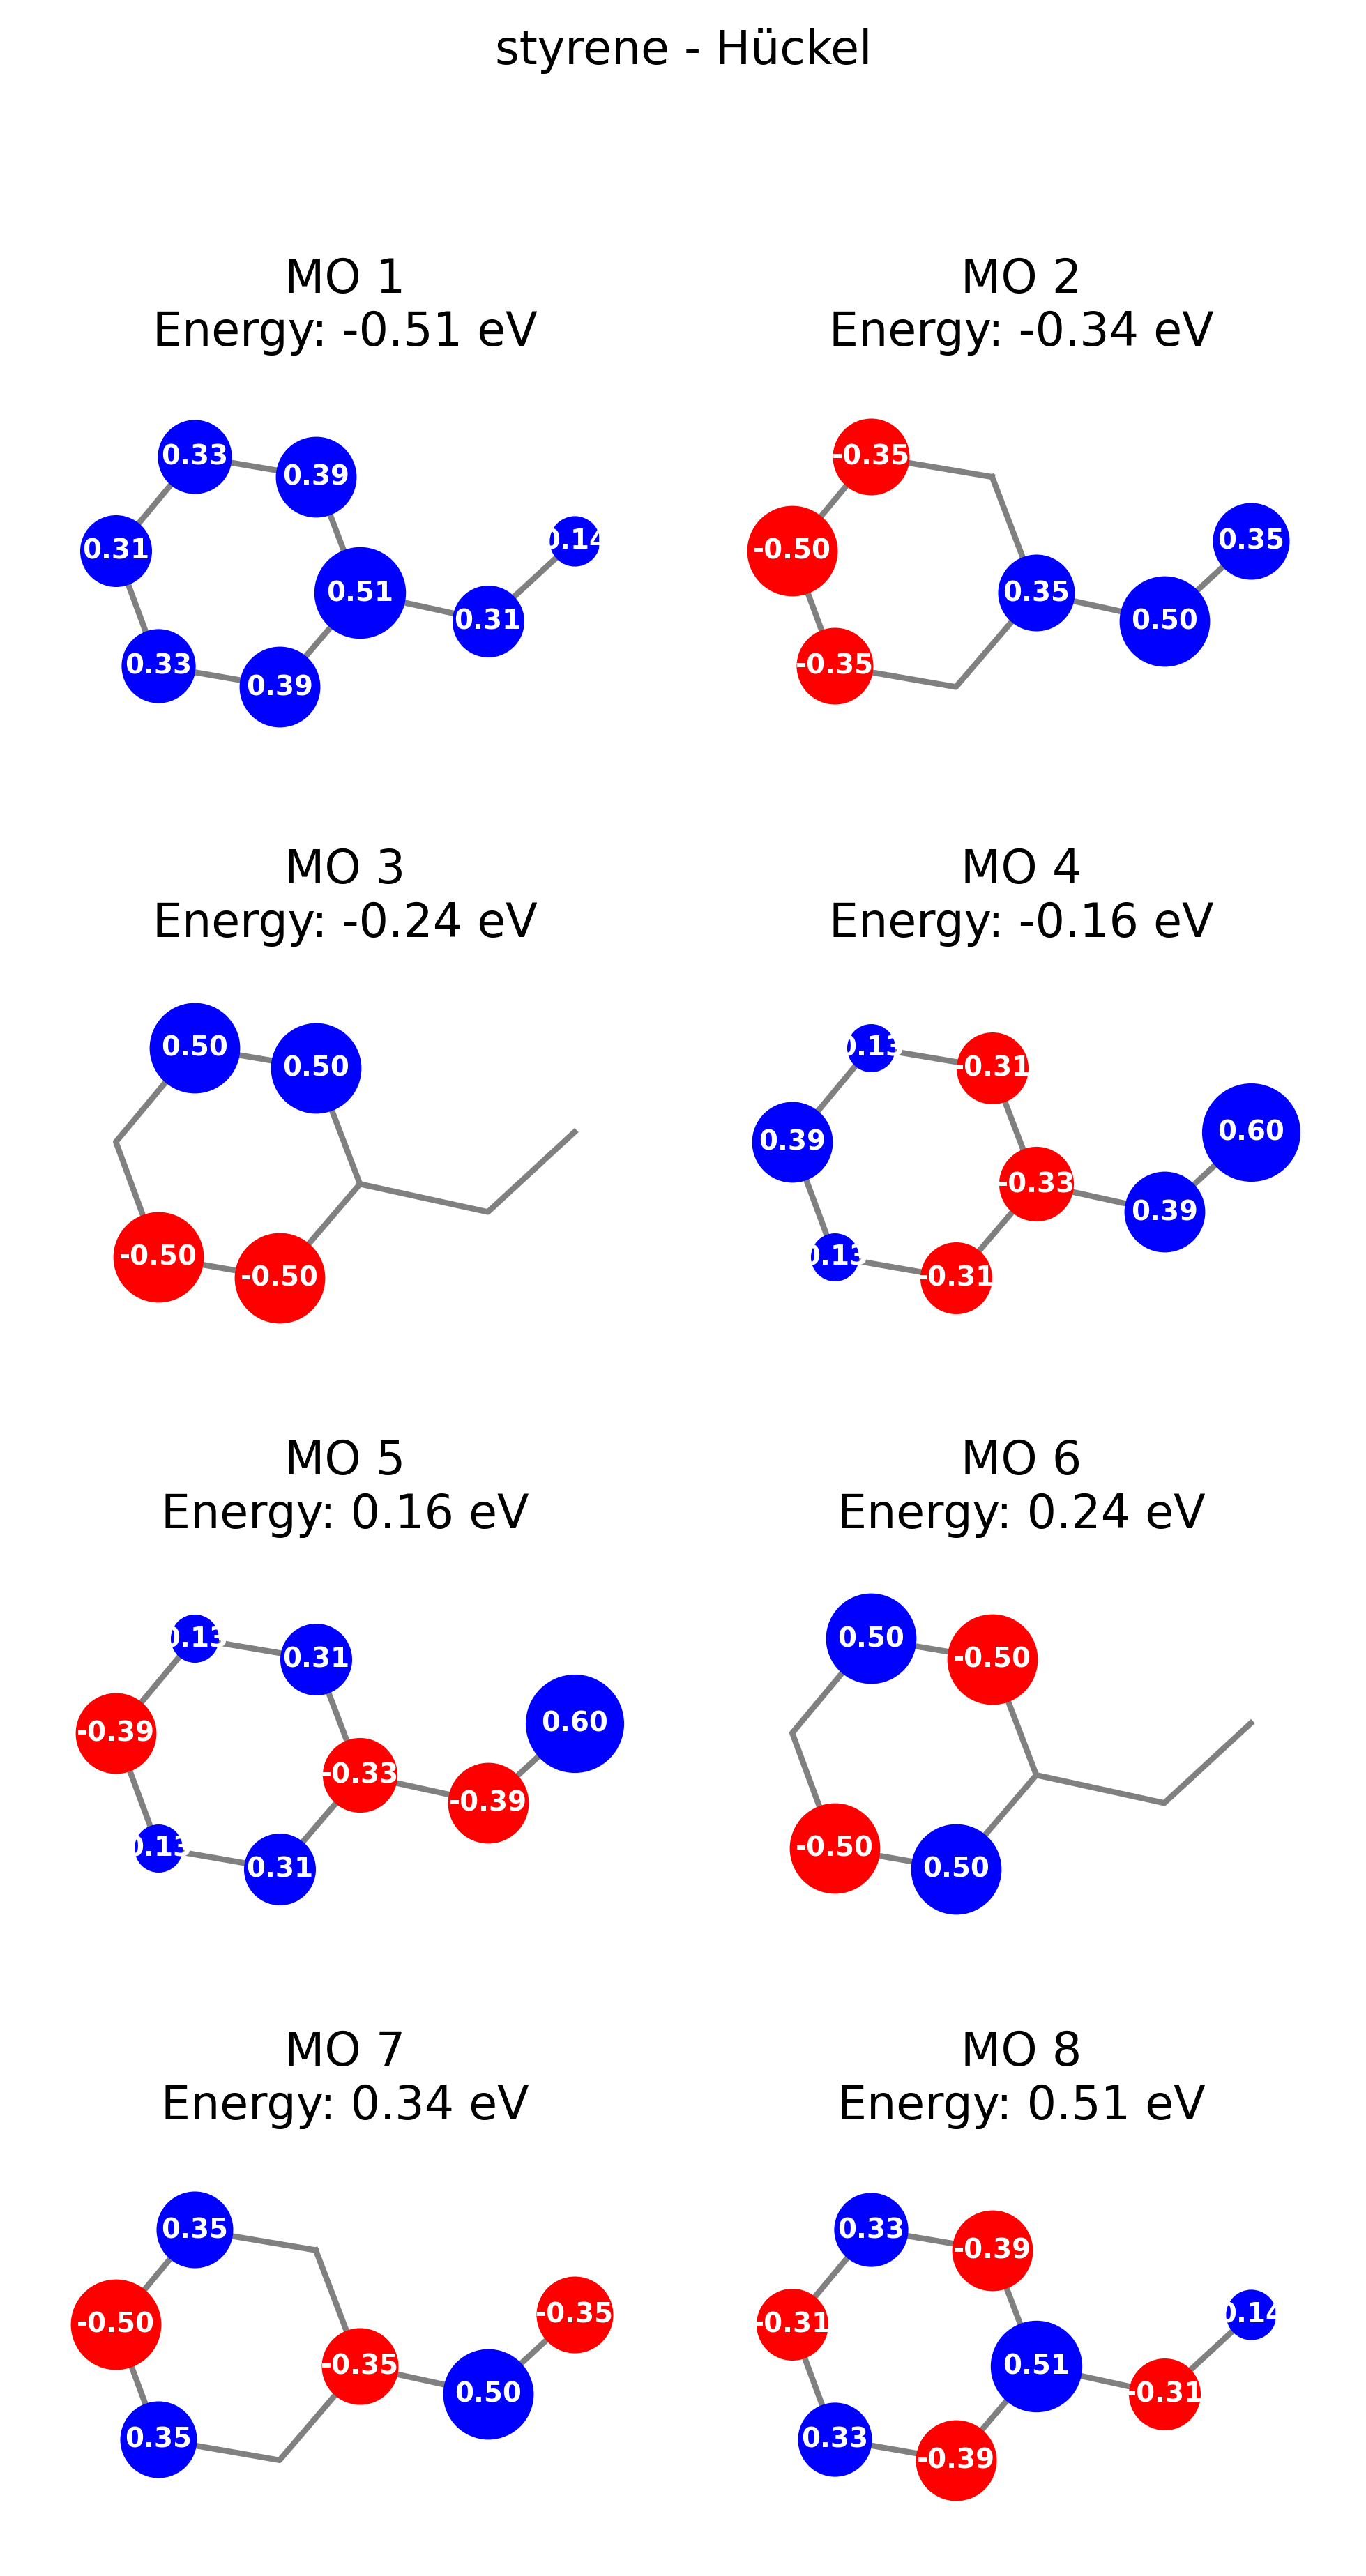

In [58]:
pts.plot_MOs(eigenvalues, eigenvectors, coordinates, extra_bounds, 'styrene', 'Hückel', (5,10))

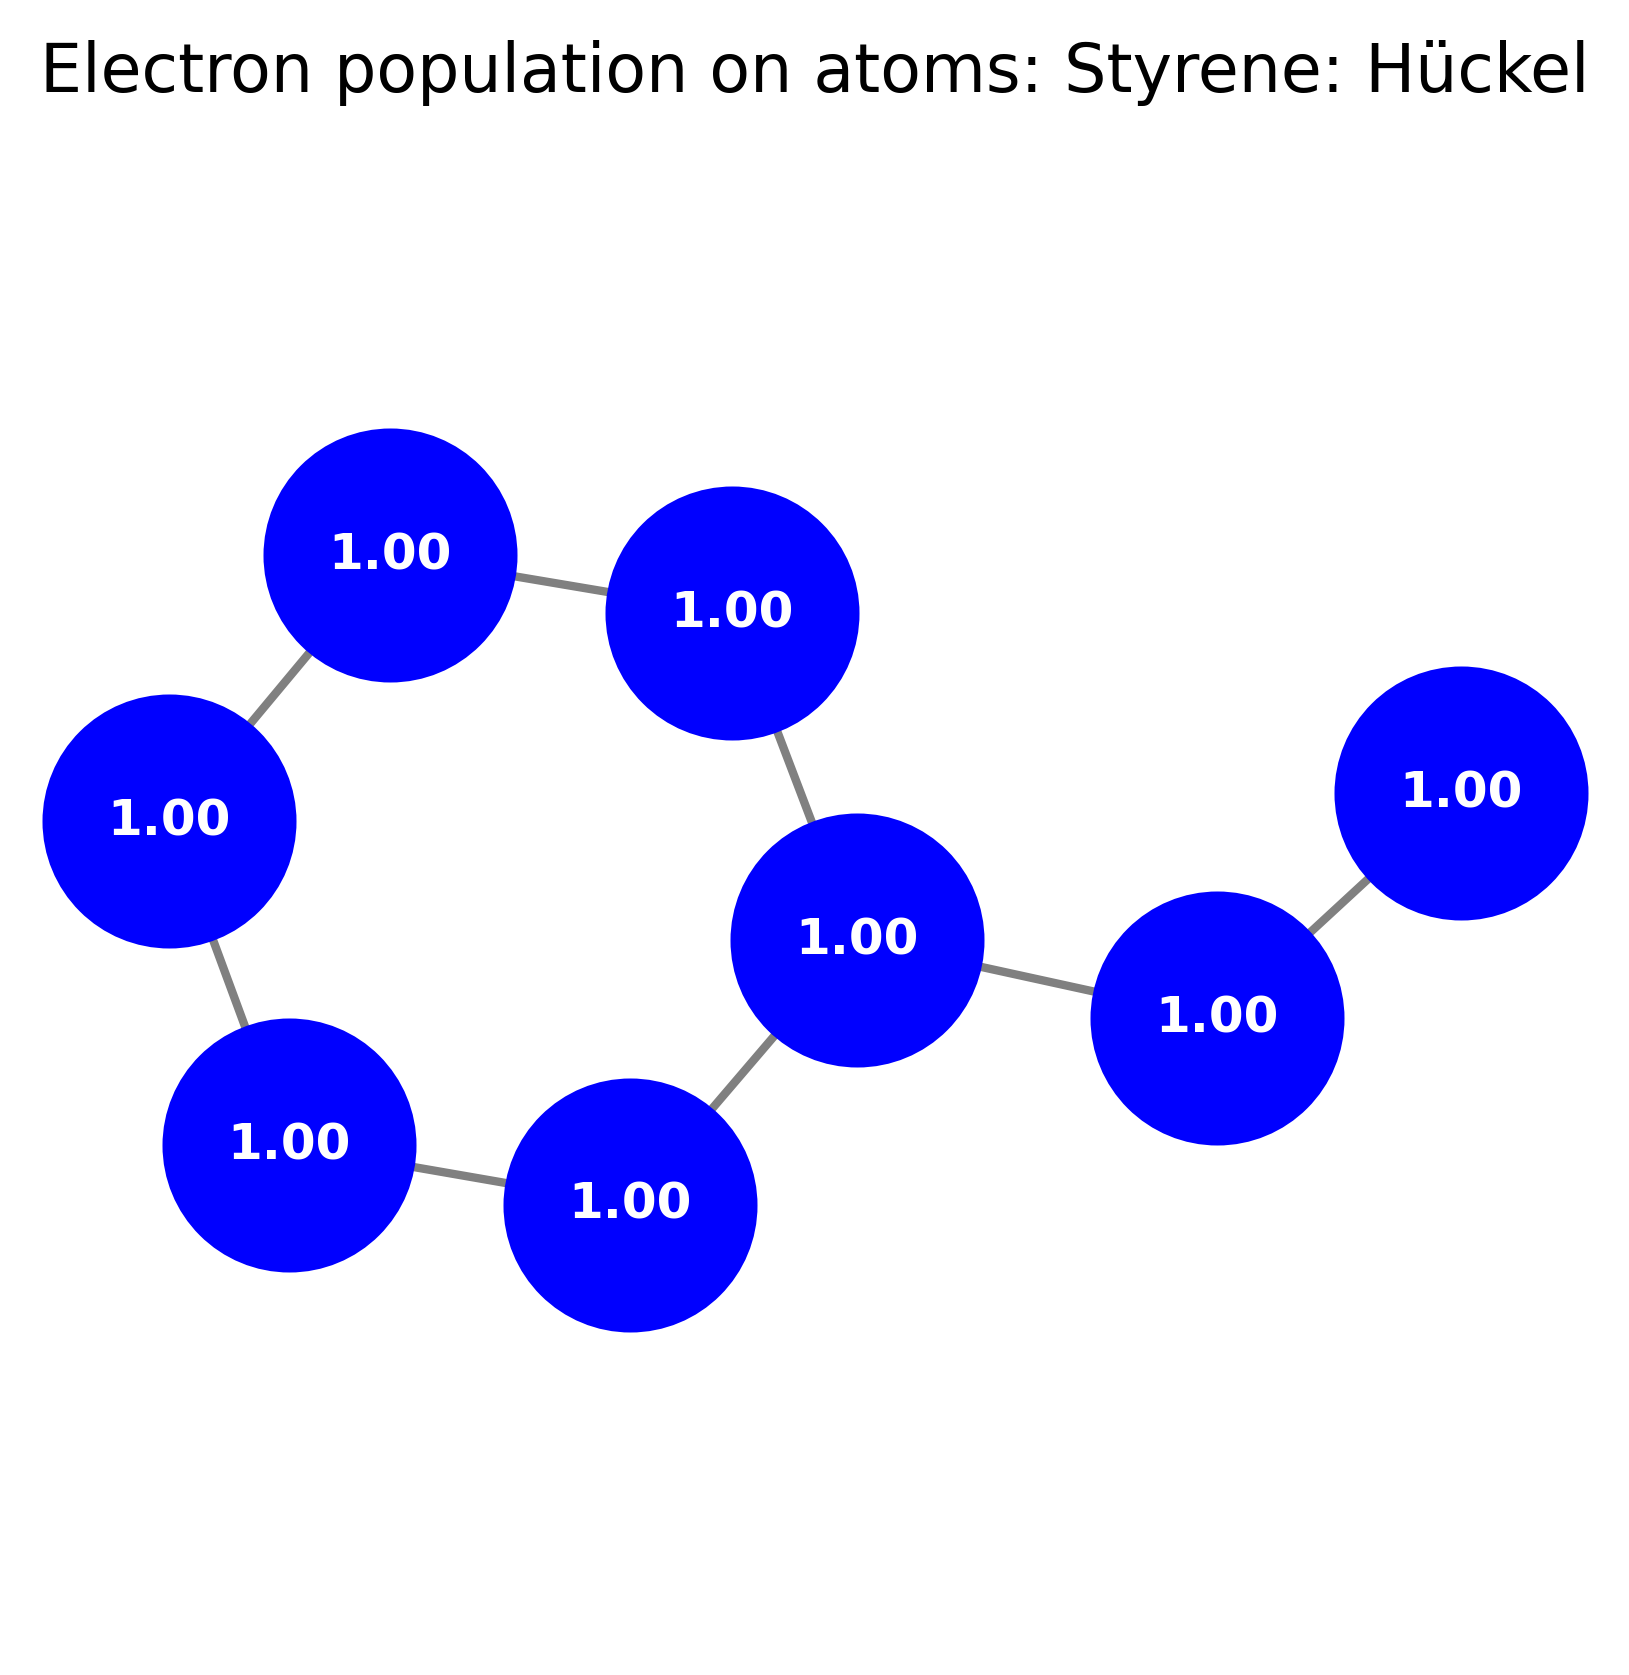

In [59]:
D_huckel = pts.making_D(eigenvectors, 8)

pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D_huckel, 'Styrene', 'Hückel')

In [60]:
ovp = hf.get_ovlp()
ovp = - ovp[[2, 7, 12, 17, 22, 27, 32, 37]][:, [2, 7, 12, 17, 22, 27, 32, 37]]


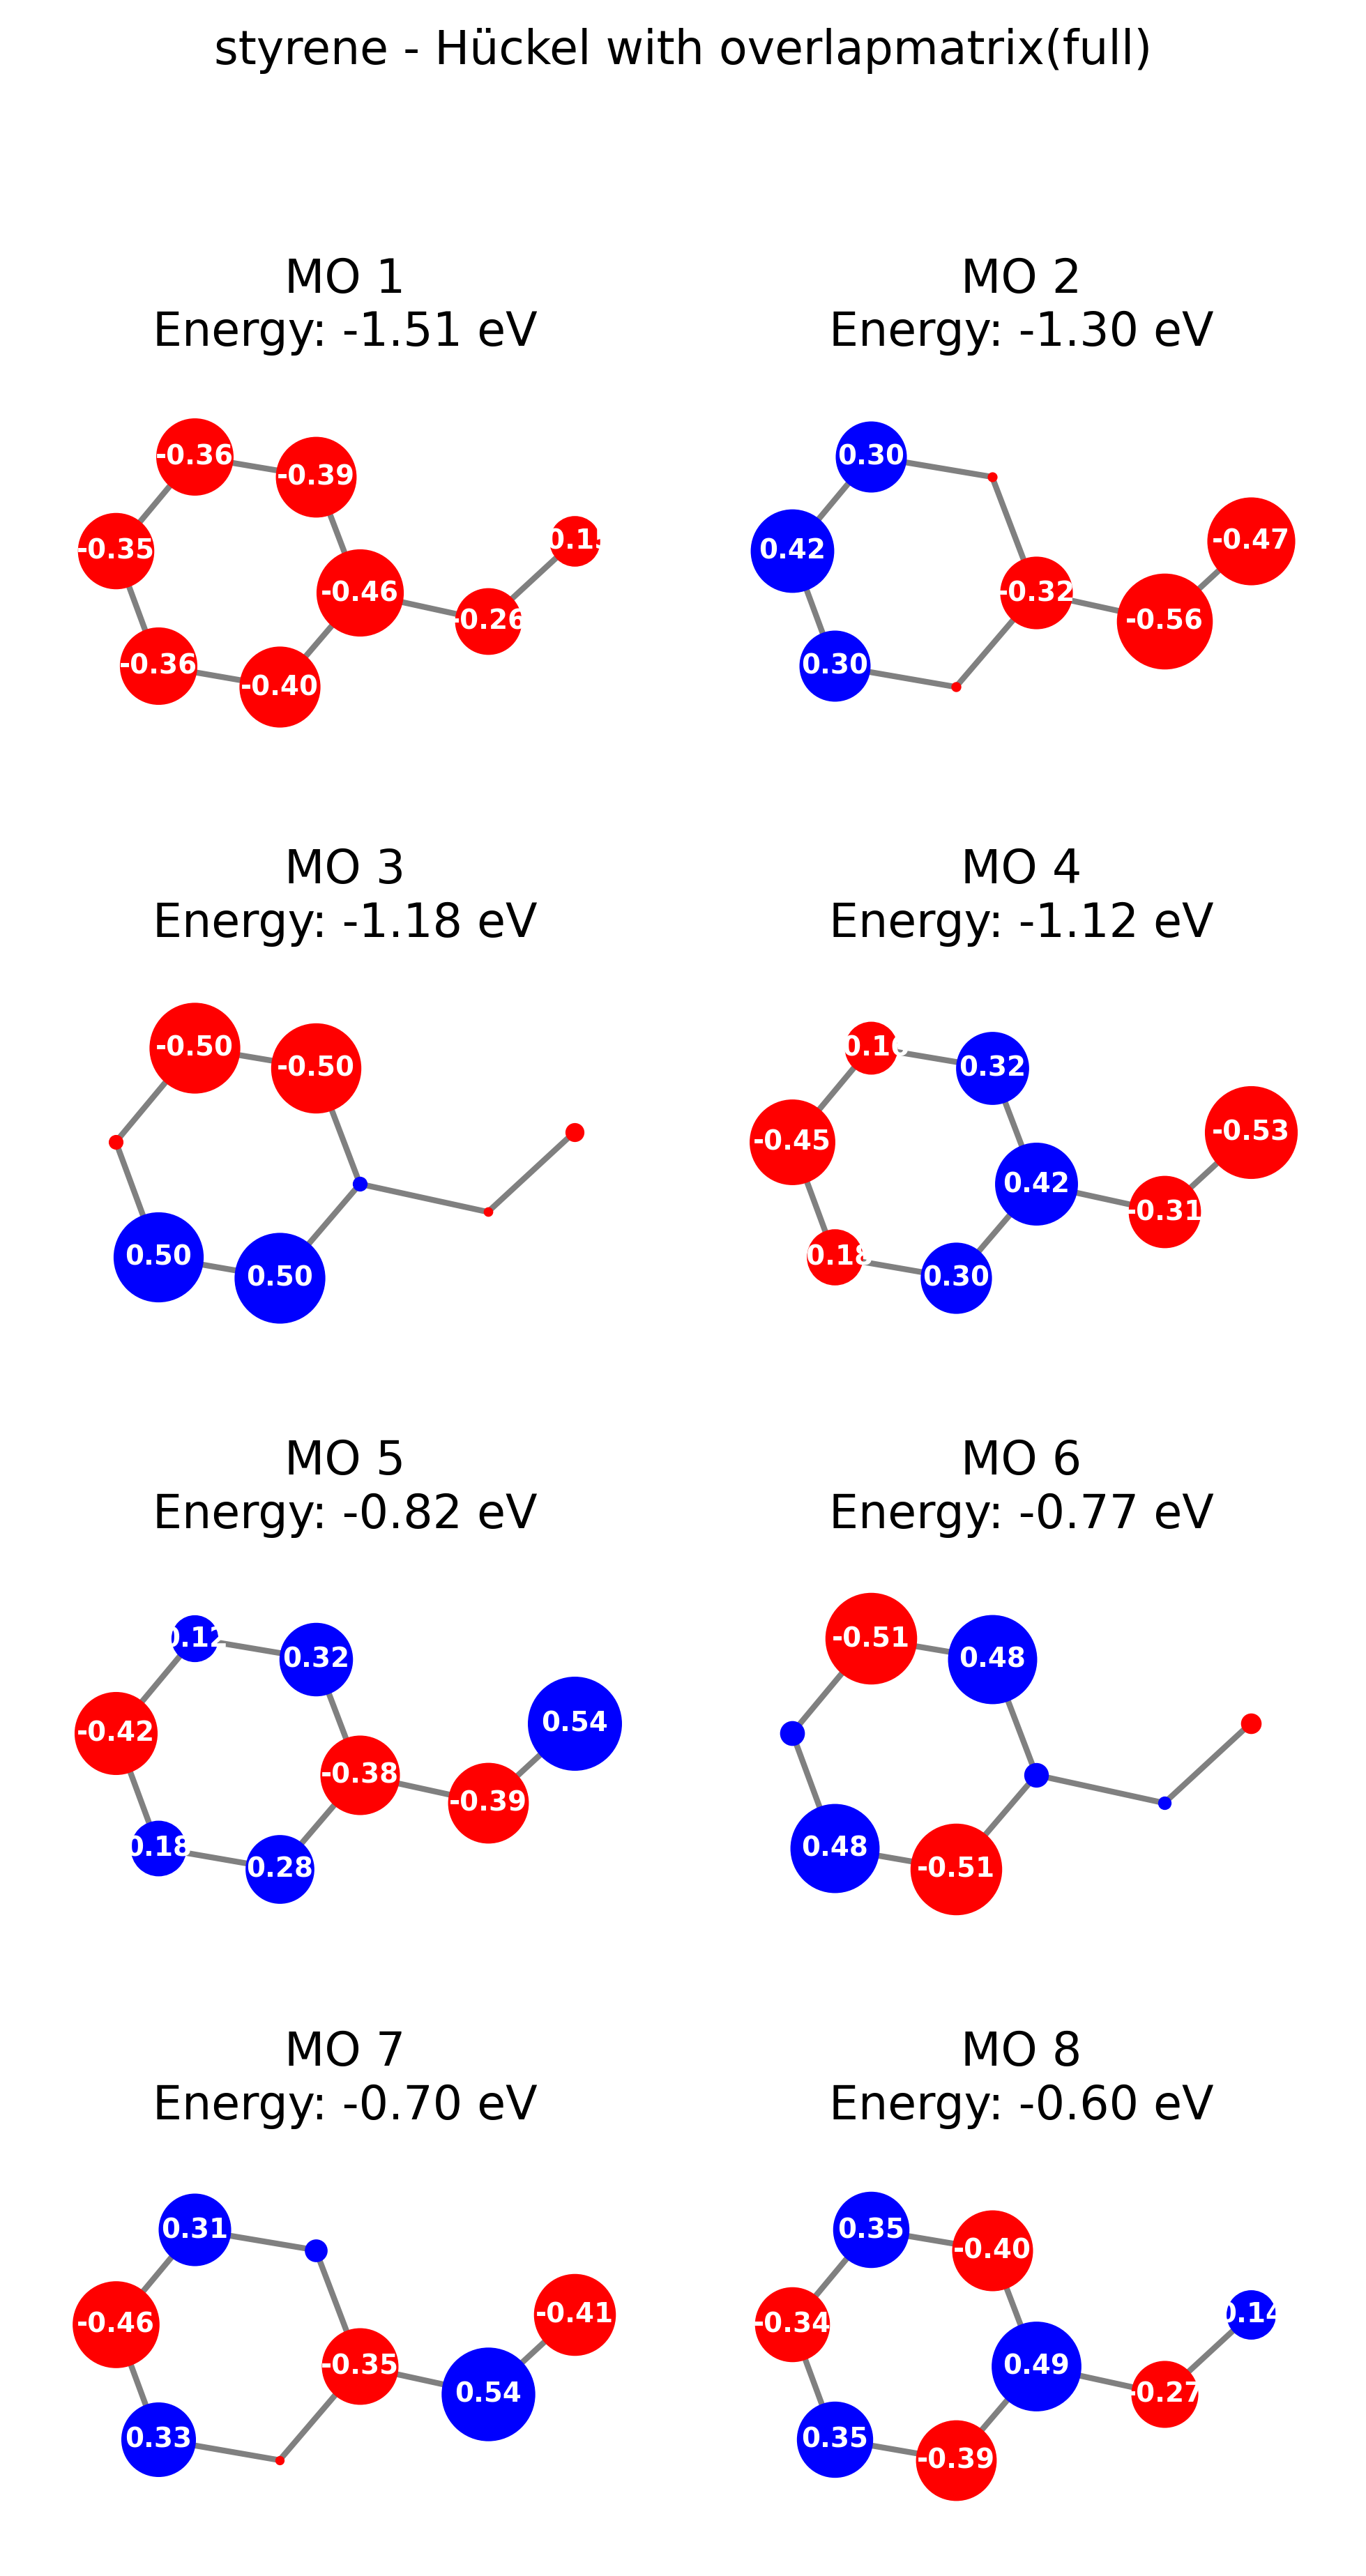

In [61]:
eigval, eigvec = np.linalg.eigh(ovp)
pts.plot_MOs(eigval, eigvec, coordinates, extra_bounds, 'styrene', 'Hückel with overlapmatrix(full)', (5,10))

[1.04234106 0.97102081 0.97485905 1.00521819 0.99953308 1.00082114
 0.99899983 1.00720684]


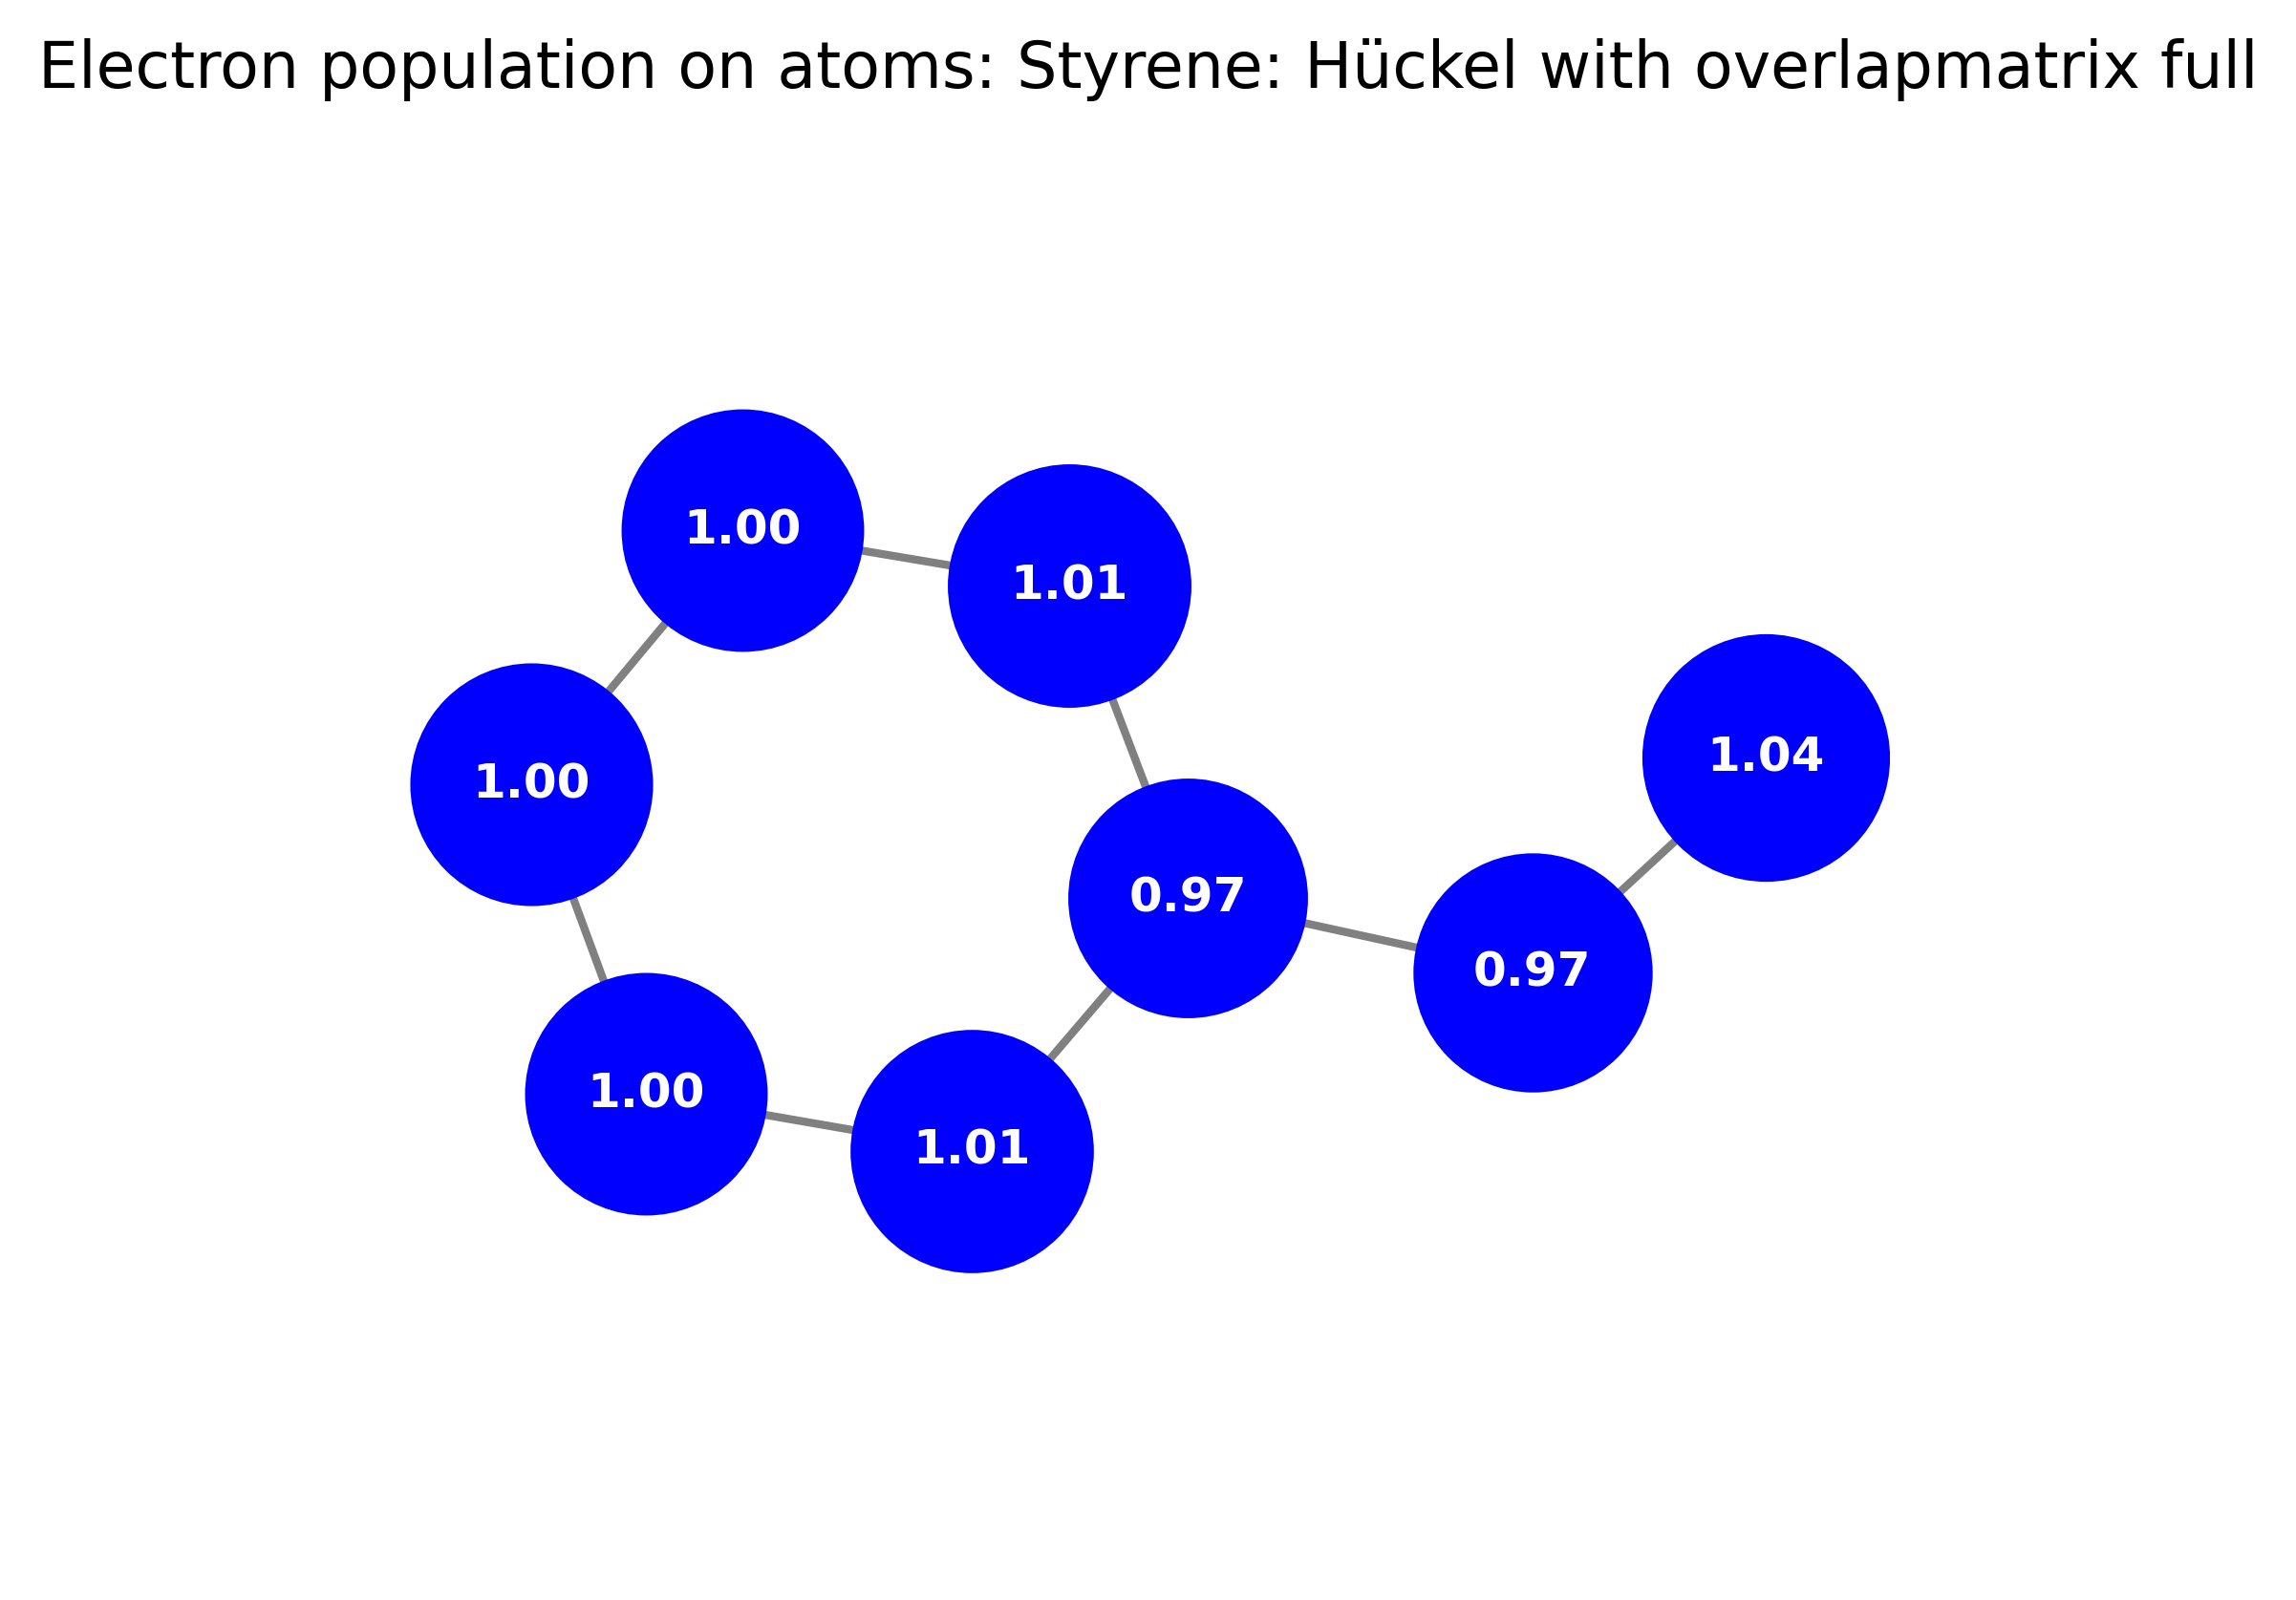

In [62]:
D_huckel_ovf = pts.making_D(eigvec, 8)

print(np.diag(D_huckel_ovf))

pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D_huckel_ovf, 'Styrene', 'Hückel with overlapmatrix full')

In [63]:
for i in range(8):
    for j in range(8):
        if (i,j) not in [ (0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (2,7), (7,2)]:
            ovp[i][j] = 0
np.set_printoptions(threshold=np.inf)
print(ovp)

[[ 0.         -0.23747917  0.          0.          0.          0.
   0.          0.        ]
 [-0.23747917  0.         -0.18080028  0.          0.          0.
   0.          0.        ]
 [ 0.         -0.18080028  0.         -0.21042758  0.          0.
   0.         -0.20853928]
 [ 0.          0.         -0.21042758  0.         -0.21380105  0.
   0.          0.        ]
 [ 0.          0.          0.         -0.21380105  0.         -0.21473523
   0.          0.        ]
 [ 0.          0.          0.          0.         -0.21473523  0.
  -0.21462021  0.        ]
 [ 0.          0.          0.          0.          0.         -0.21462021
   0.         -0.21348443]
 [ 0.          0.         -0.20853928  0.          0.          0.
  -0.21348443  0.        ]]


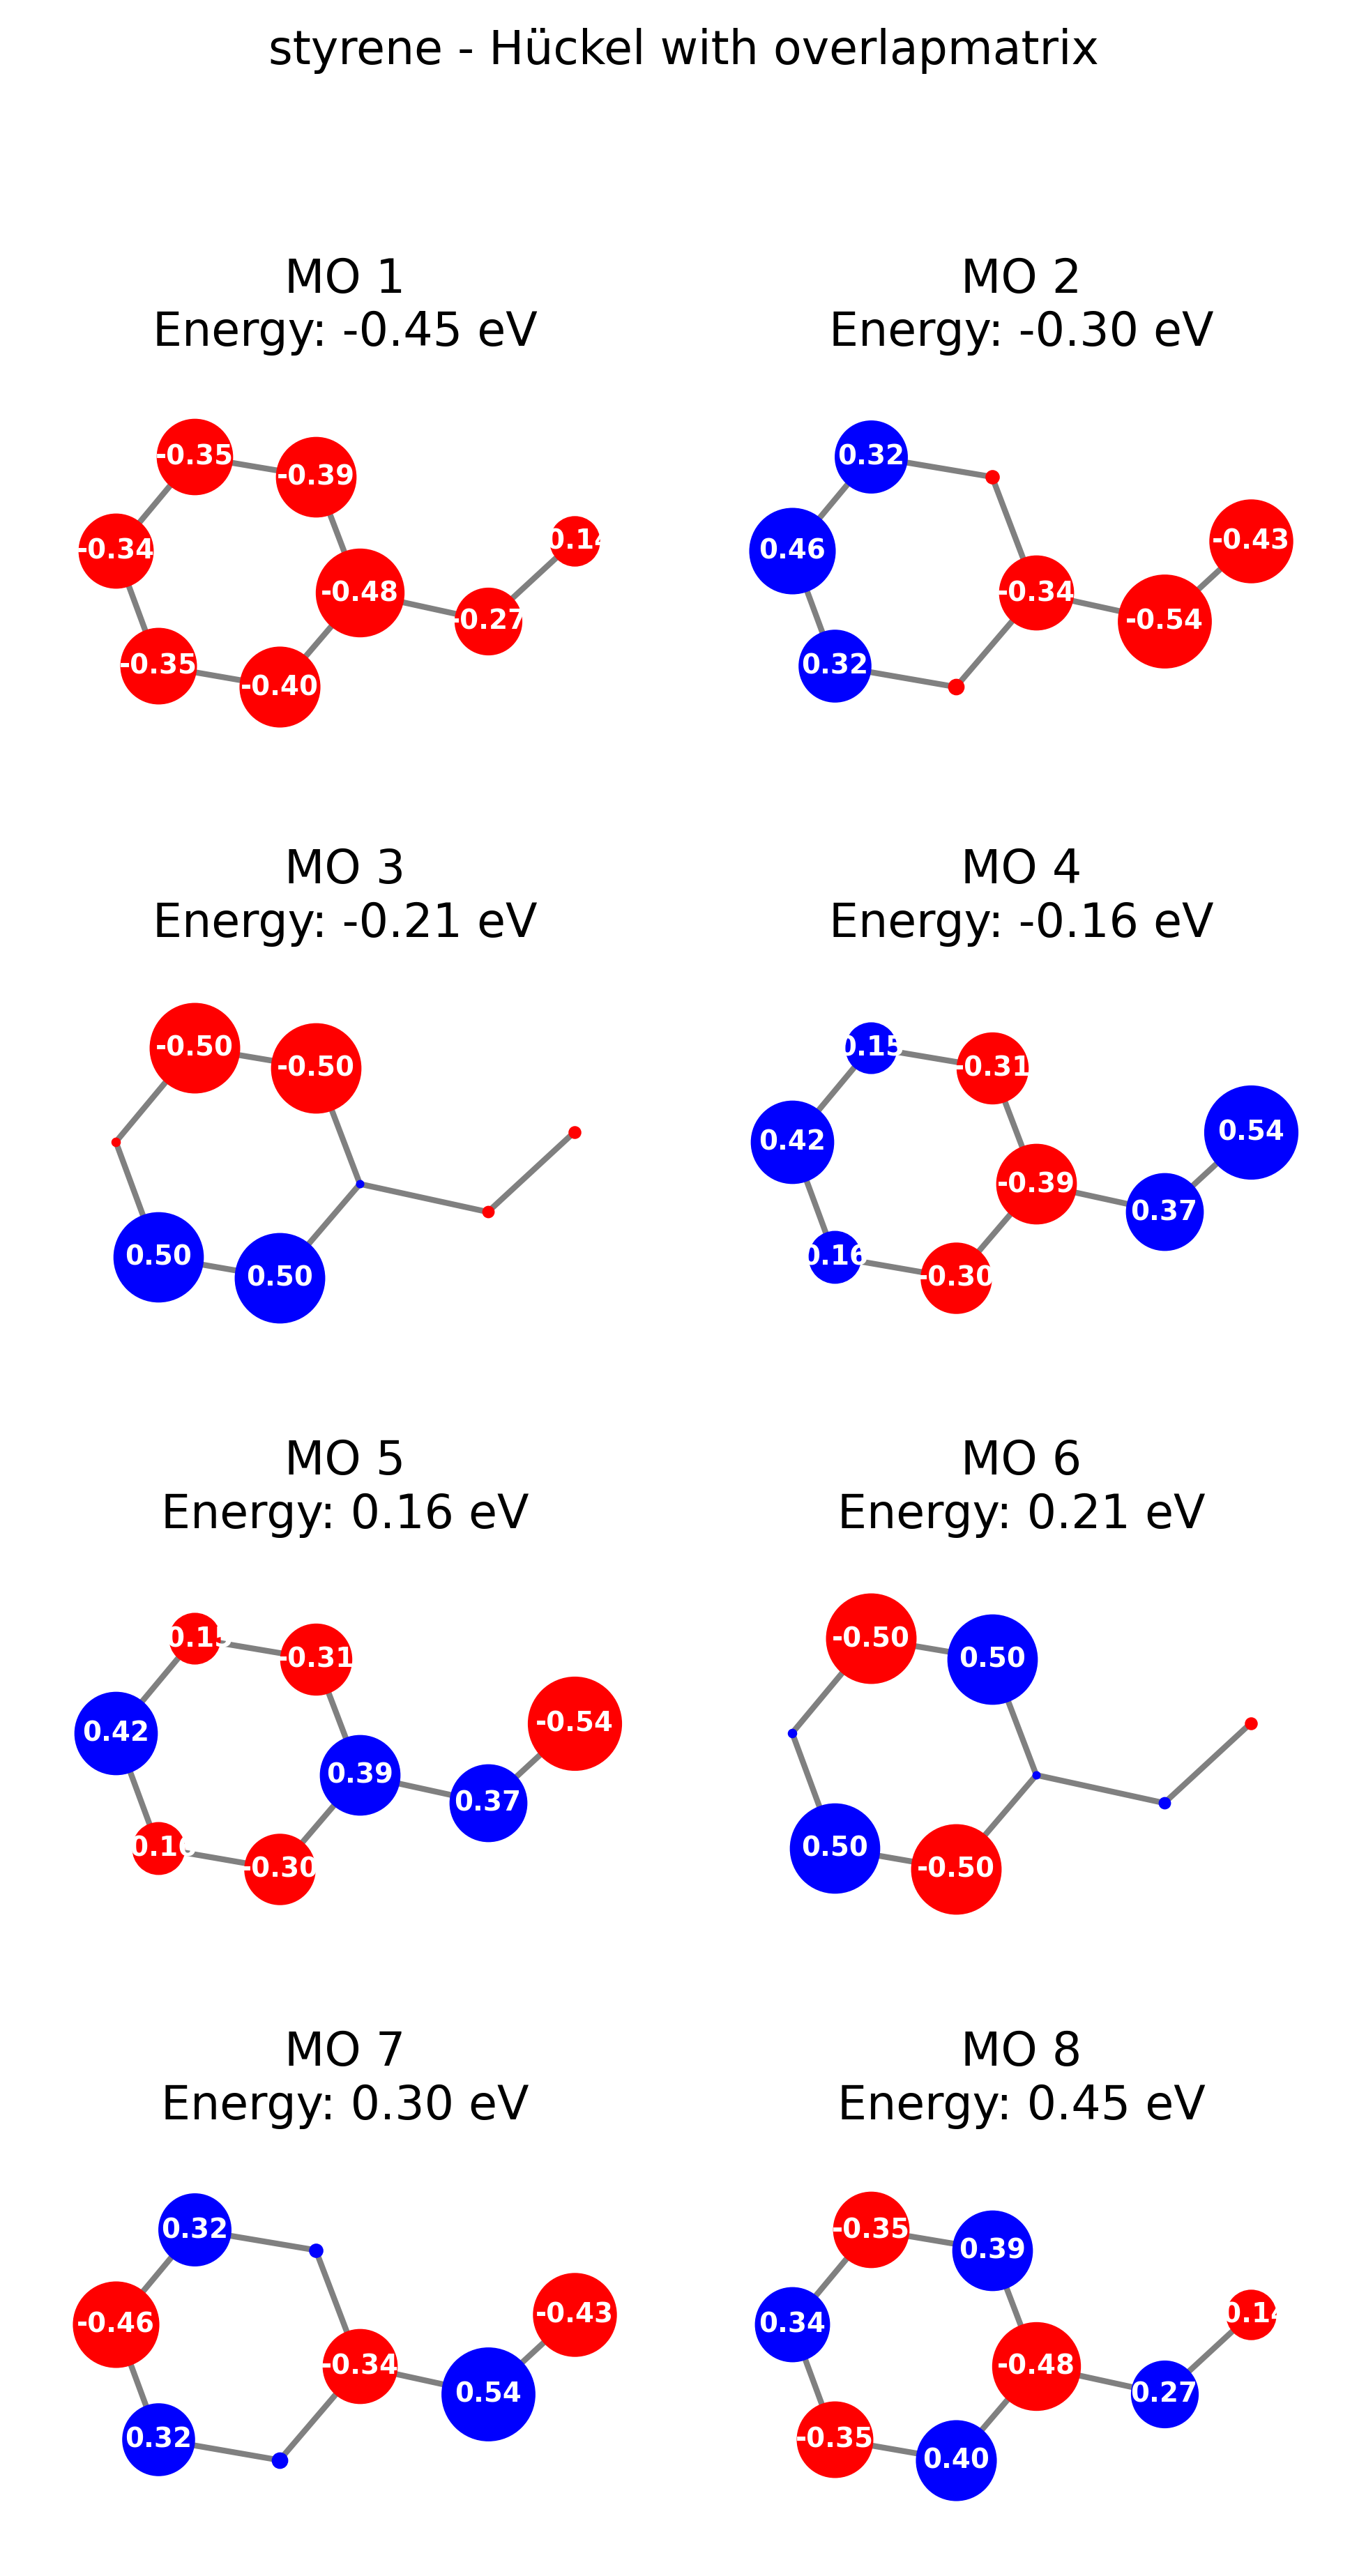

In [64]:


eigval, eigvec = np.linalg.eigh(ovp)
pts.plot_MOs(eigval, eigvec, coordinates, extra_bounds, 'styrene', 'Hückel with overlapmatrix', (5,10))

[1. 1. 1. 1. 1. 1. 1. 1.]


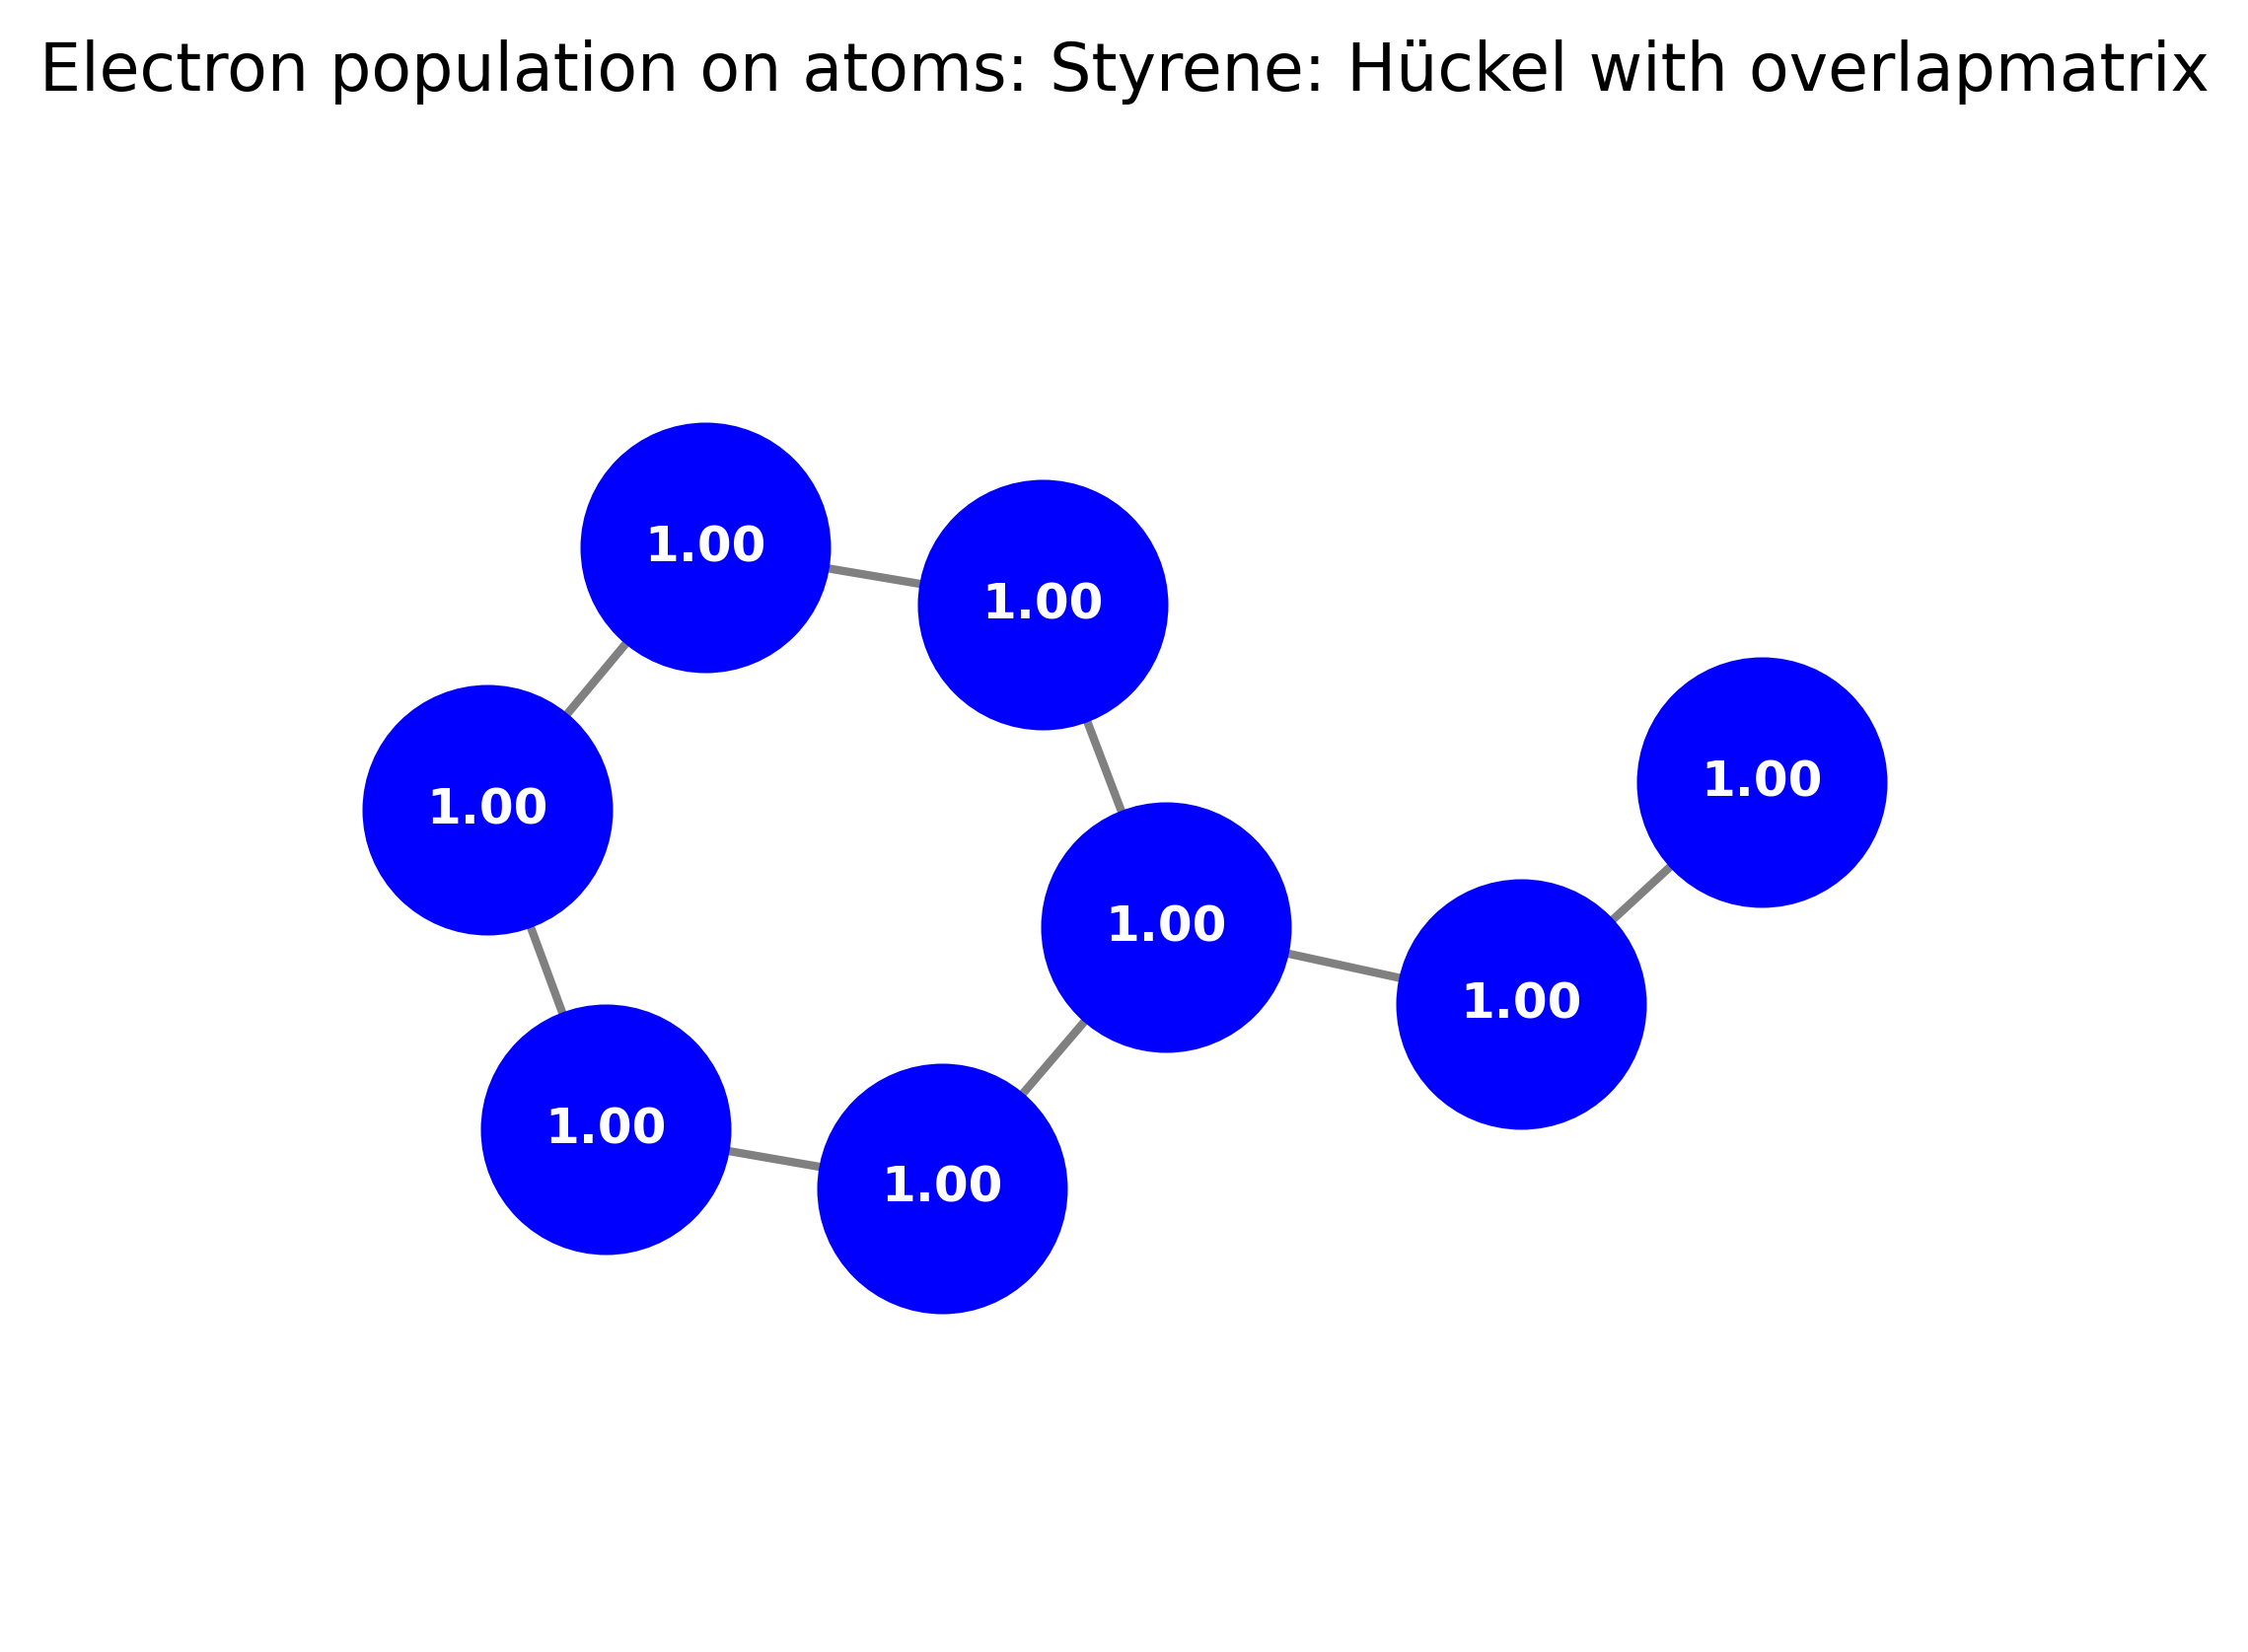

In [65]:
D_huckel_ov = pts.making_D(eigvec, 8)
print(np.diag(D_huckel_ov))

pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D_huckel_ov, 'Styrene', 'Hückel with overlapmatrix')